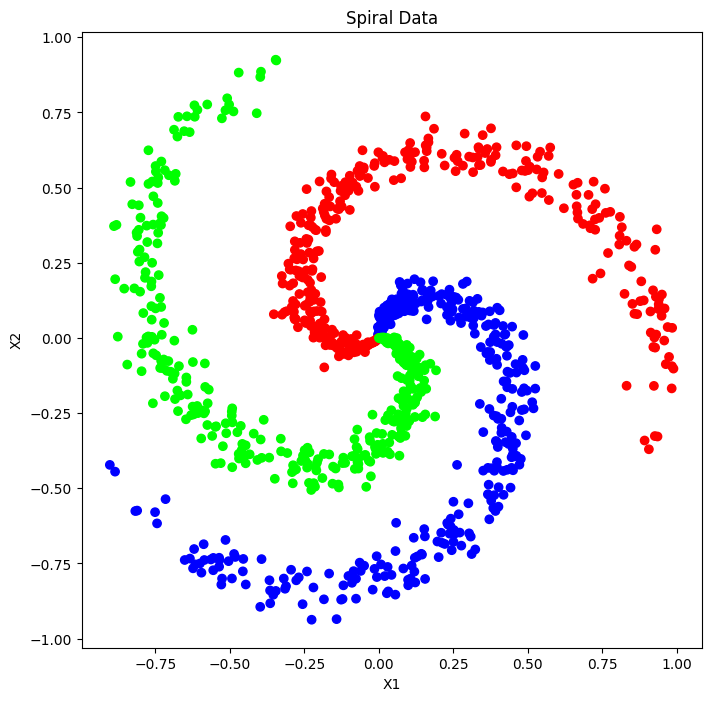

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense      # type: ignore


# Function to generate spiral data
def generate_spiral_data(n_points,n_classes):
    X = []
    y = []

    for class_number in range(n_classes):
        ix = range(n_points * class_number,n_points * (class_number + 1))
        r = np.linspace(0.0,1,n_points)  # radius
        t = np.linspace(class_number * 4,(class_number + 1)*4,n_points) + np.random.randn(n_points)*0.2  # theta
        X.extend(np.c_[r*np.sin(t),r*np.cos(t)])
        y.extend([class_number]*n_points)
    return np.array(X),np.array(y)

# General spiral data
X,y = generate_spiral_data(333,3)   # 999 points,3 classes

# Plot the spiral data
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.title('Spiral Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



In [65]:
# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data 
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64,input_dim=2,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))


/Users/aryan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
X_train_scaled

array([[ 0.22029968, -0.76840828],
       [-0.76232452, -1.97413239],
       [ 0.63848425, -1.0139179 ],
       ...,
       [-0.83494346, -1.13132795],
       [-0.56835847,  0.54967293],
       [ 0.70796886,  0.30753729]])

In [67]:
X_test_scaled

array([[-8.42900877e-01,  2.58720929e-01],
       [ 4.00550801e-02, -9.12698694e-01],
       [ 1.09110837e+00, -1.05925997e+00],
       [-1.28514266e+00, -1.87389251e+00],
       [ 1.94020884e-01, -4.72184829e-01],
       [ 7.00080503e-01,  1.78466917e+00],
       [-1.31431242e+00, -1.00411506e+00],
       [ 6.86153643e-01,  1.51380126e+00],
       [-6.98353978e-01,  3.19509893e-01],
       [ 8.19428989e-02,  1.23040943e-02],
       [-1.88442857e+00,  5.66428434e-01],
       [ 2.07234192e+00,  8.28550414e-01],
       [-1.22733780e+00, -7.46430621e-01],
       [ 1.45980286e+00,  1.44385821e+00],
       [ 2.57287292e-01, -2.59135041e-01],
       [ 3.97923945e-01,  3.99964106e-01],
       [-5.88776719e-01, -9.74595660e-01],
       [-6.72928675e-01,  8.02281794e-01],
       [-3.16890087e-01, -9.67504625e-02],
       [ 7.30005886e-01, -1.33837307e+00],
       [ 8.14663005e-01,  1.65927715e+00],
       [-3.08218300e-01,  3.45626729e-03],
       [-1.62274267e+00, -3.86066279e-01],
       [-1.

In [68]:
# Compile the model
# model.compile(optimizer=tf.keras.optimizers.SGD(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])


In [69]:
# Fit the model
history = model.fit(x=X_train_scaled,y=y_train,validation_data=(X_test_scaled,y_test),epochs=200,verbose=1)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5034 - loss: 0.8658 - val_accuracy: 0.4850 - val_loss: 0.7777
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4934 - loss: 0.7770 - val_accuracy: 0.4900 - val_loss: 0.7631
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5114 - loss: 0.7531 - val_accuracy: 0.5000 - val_loss: 0.7642
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5512 - loss: 0.7193 - val_accuracy: 0.5000 - val_loss: 0.7554
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5233 - loss: 0.7295 - val_accuracy: 0.5050 - val_loss: 0.7669
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5148 - loss: 0.7523 - val_accuracy: 0.5050 - val_loss: 0.7581
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5159 - loss: 0.7547 - val_accuracy: 0.5100 - val_loss: 0.7638
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5161 - loss: 0.7567 - val_accuracy: 0.

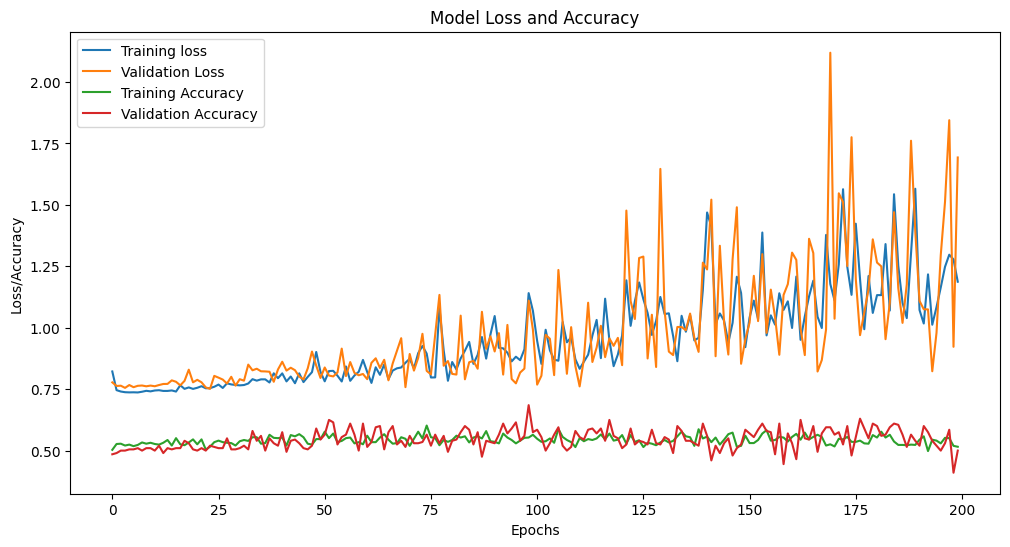

In [70]:
# Plot the training history
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


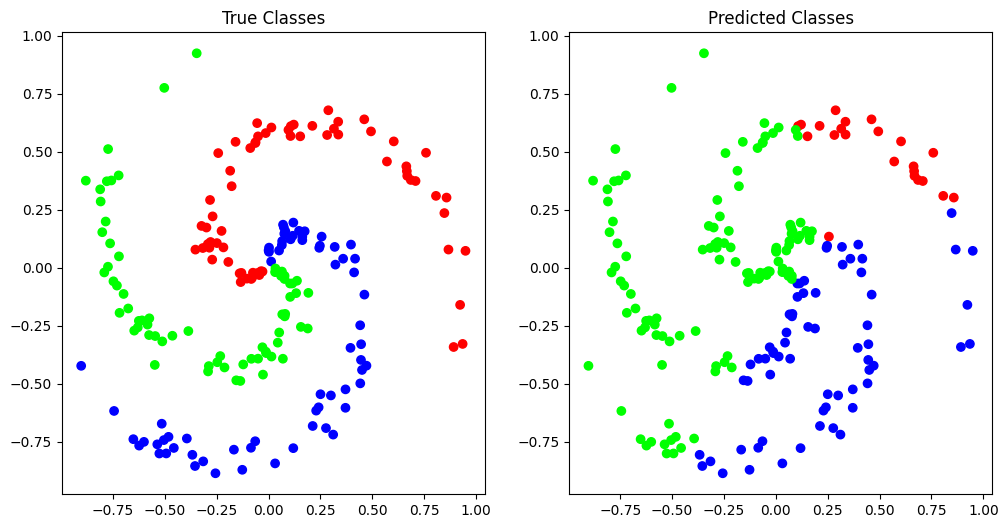

In [71]:
# Predict the class for test data
y_pred = np.argmax(model.predict(X_test_scaled),axis=1)

# Plot the comparison of predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='brg')
plt.title('True Classes')
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='brg')
plt.title('Predicted Classes')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


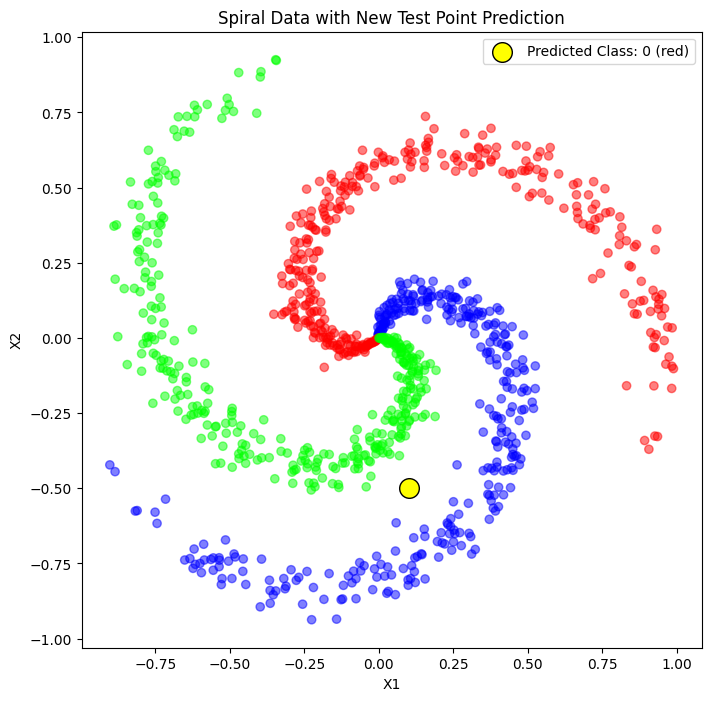

In [72]:
# New test points
new_point = np.array([[0.1, -0.5]])
new_point_scaled = scaler.transform(new_point)
new_pred = np.argmax(model.predict(new_point_scaled), axis=1)

# Color map for legend
color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Plot the new test point prediction
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', alpha=0.5)
plt.scatter(new_point[:, 0], new_point[:, 1], 
           c='yellow', 
           edgecolors='black', 
           s=200,  # Increased size for better visibility
           label=f'Predicted Class: {new_pred[0]} ({color_map[new_pred[0]]})')
plt.title('Spiral Data with New Test Point Prediction')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


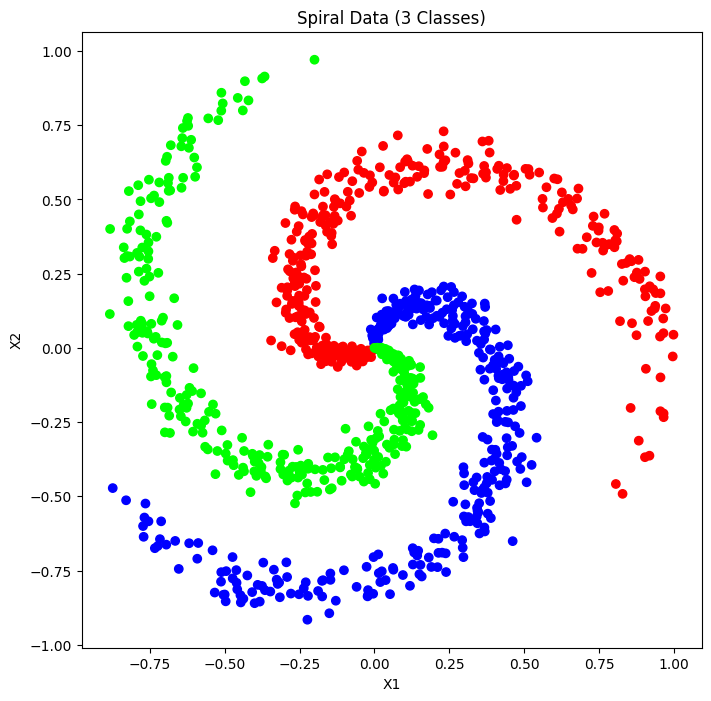

Epoch 1/200


/Users/aryan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4674 - loss: 0.9457 - val_accuracy: 0.5100 - val_loss: 0.7718 - learning_rate: 0.0010
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5552 - loss: 0.7425 - val_accuracy: 0.5100 - val_loss: 0.7588 - learning_rate: 0.0010
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5259 - loss: 0.7619 - val_accuracy: 0.5100 - val_loss: 0.7557 - learning_rate: 0.0010
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5110 - loss: 0.7715 - val_accuracy: 0.5000 - val_loss: 0.7634 - learning_rate: 0.0010
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5518 - loss: 0.7373 - val_accuracy: 0.5100 - val_loss: 0.7582 - learning_rate: 0.0010
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5477 - loss: 0.7407 - val_accuracy: 0.5150 - val_loss: 0.7599 - learning_rate: 0.0010
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5511 - loss: 0.7333 - val_accuracy

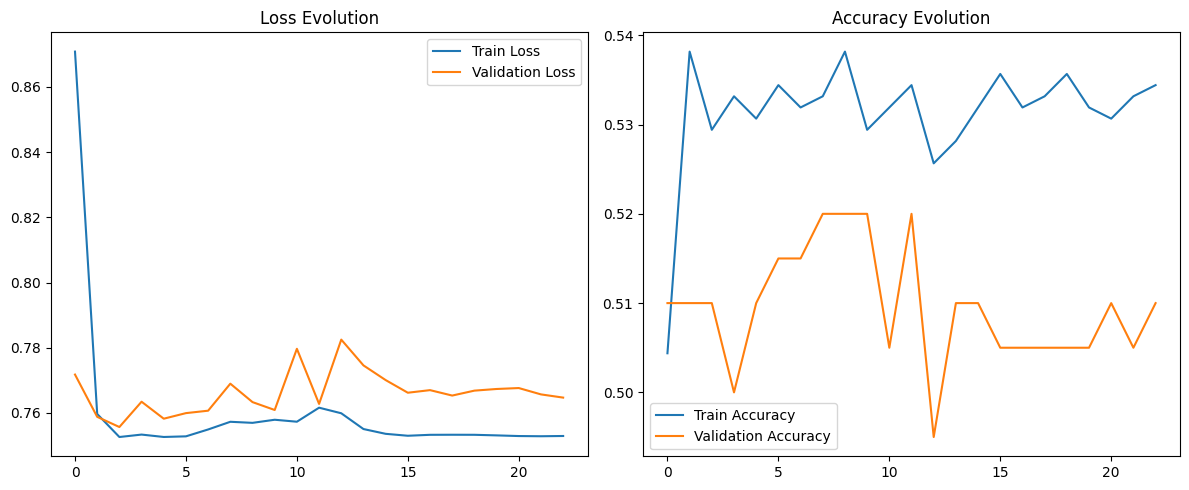

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


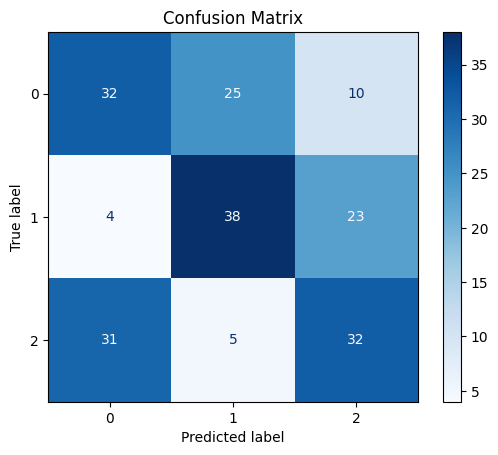

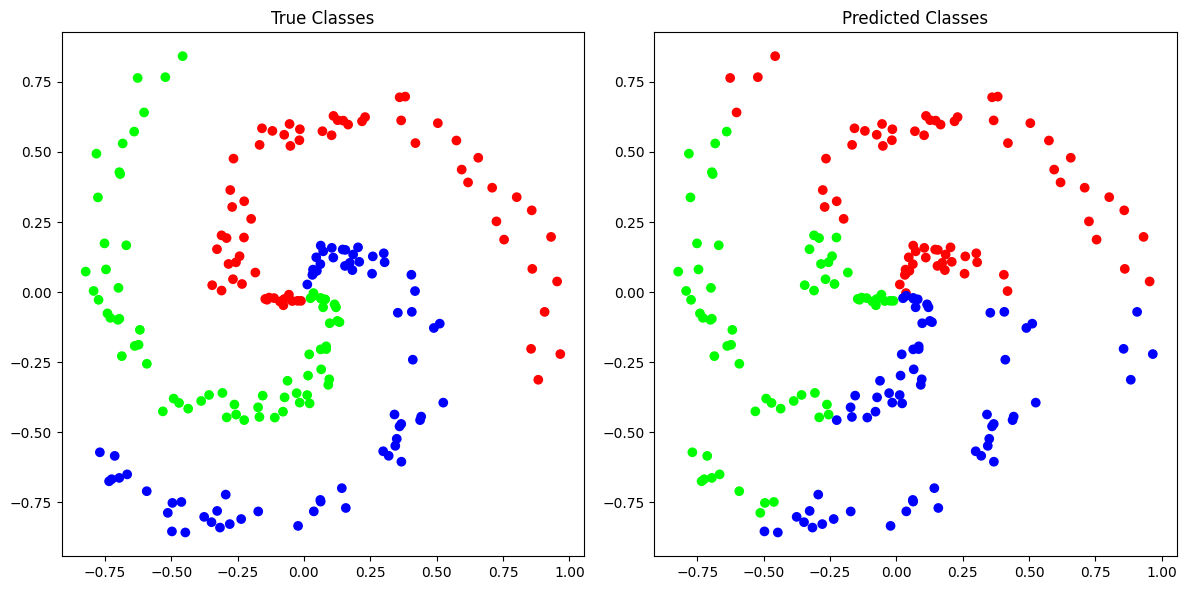

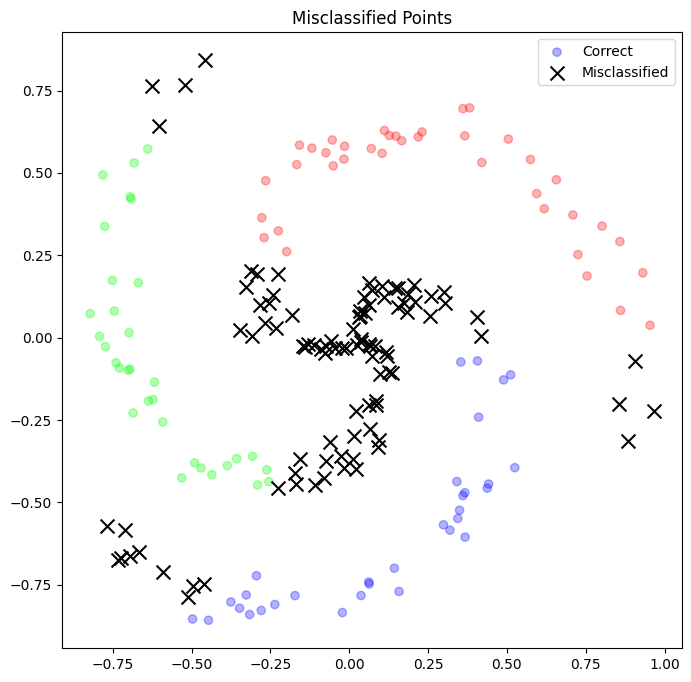

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


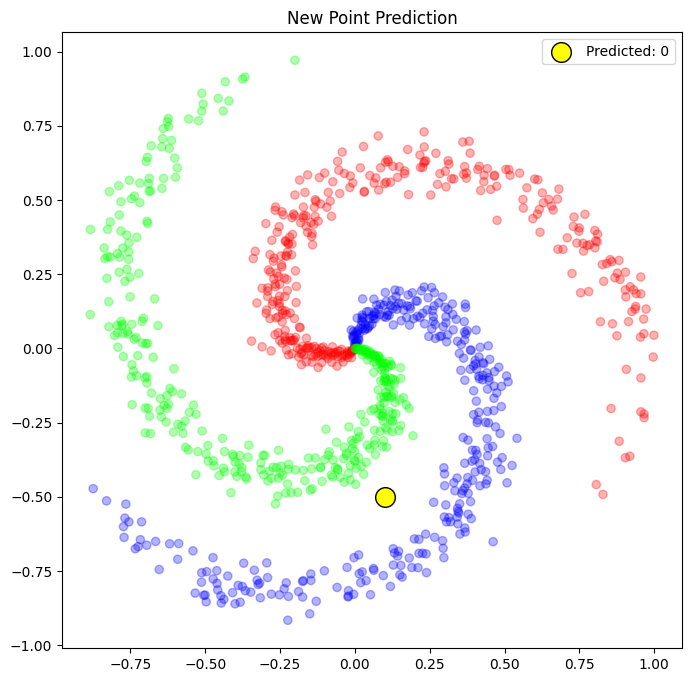

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Generate spiral data
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for class_number in range(n_classes):
        ix = range(n_points * class_number, n_points * (class_number + 1))
        r = np.linspace(0.0, 1, n_points)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, n_points) + np.random.randn(n_points) * 0.2
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([class_number] * n_points)
    return np.array(X), np.array(y)

# Generate and plot data
X, y = generate_spiral_data(333, 3)
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.title('Spiral Data (3 Classes)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile with callbacks
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=10)
]

# Train model
history = model.fit(X_train_scaled, y_train, 
                   validation_data=(X_test_scaled, y_test),
                   epochs=200, verbose=1, callbacks=callbacks)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate on test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot true vs predicted
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='brg')
plt.title('True Classes')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='brg')
plt.title('Predicted Classes')
plt.tight_layout()
plt.show()

# Highlight misclassified points
misclassified = (y_test != y_pred)
plt.figure(figsize=(8, 8))
plt.scatter(X_test[~misclassified, 0], X_test[~misclassified, 1], 
            c=y_test[~misclassified], cmap='brg', alpha=0.3, label='Correct')
plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1], 
            c='black', marker='x', s=100, label='Misclassified')
plt.title('Misclassified Points')
plt.legend()
plt.show()

# New prediction
new_point = np.array([[0.1, -0.5]])
new_point_scaled = scaler.transform(new_point)
new_pred = np.argmax(model.predict(new_point_scaled), axis=1)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', alpha=0.3)
plt.scatter(new_point[:, 0], new_point[:, 1], 
           c='yellow', edgecolors='black', s=200,
           label=f'Predicted: {new_pred[0]}')
plt.title('New Point Prediction')
plt.legend()
plt.show()